<a href="https://colab.research.google.com/github/forrestpark/MachineLearning/blob/main/Final_model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.despine(left=True, right=True, bottom=True, top=True)
sns.set(style="white", palette="muted", color_codes=True, font_scale=1.25)

<Figure size 432x288 with 0 Axes>

In [ ]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

## Preprocessing / Visualization

ent = Entire home/apt

pri = Private room

sha = Shared room

In [ ]:
ent_feature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain&ML final/entire_home_apt_feature.csv')
ent_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain&ML final/entire_home_apt_label.csv')
pri_feature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain&ML final/private_room_feature.csv')
pri_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain&ML final/private_room_label.csv')
sha_feature = pd.read_csv('/content/drive/Shared drives/Brain&ML project/shared_home_apt_feature.csv')
sha_label = pd.read_csv('/content/drive/Shared drives/Brain&ML project/shared_home_apt_label.csv')

In [ ]:
ent_feature = ent_feature.iloc[:,2:]
ent_label = ent_label.iloc[:,1]
pri_feature = pri_feature.iloc[:,2:]
pri_label = pri_label.iloc[:,1]
sha_feature = sha_feature.iloc[:,2:]
sha_label = sha_label.iloc[:,1]

ent_data = pd.concat([ent_feature,ent_label], axis =1)
pri_data = pd.concat([pri_feature,pri_label], axis =1)
sha_data = pd.concat([sha_feature,sha_label], axis =1)

In [ ]:
ent_feature.shape, pri_feature.shape, sha_feature.shape, ent_label.shape, pri_label.shape, sha_label.shape

((6172, 4), (5176, 4), (1058, 4), (6172,), (5176,), (1058,))

In [ ]:
ent_data

,accommodates,bedrooms,latitude,longitude,price
0,6,1,37.571705,127.066407,72.0
1,8,3,37.514016,127.060018,307.0
2,6,4,37.558937,126.925101,106.0
3,5,2,37.558156,126.922975,81.0
4,6,1,37.556665,126.925628,59.0
...,...,...,...,...,...
6167,3,1,37.532783,126.901800,39.0
6168,1,1,37.503868,127.020188,40.0
6169,2,1,37.487004,127.101998,29.0
6170,4,1,37.524047,126.965181,36.0


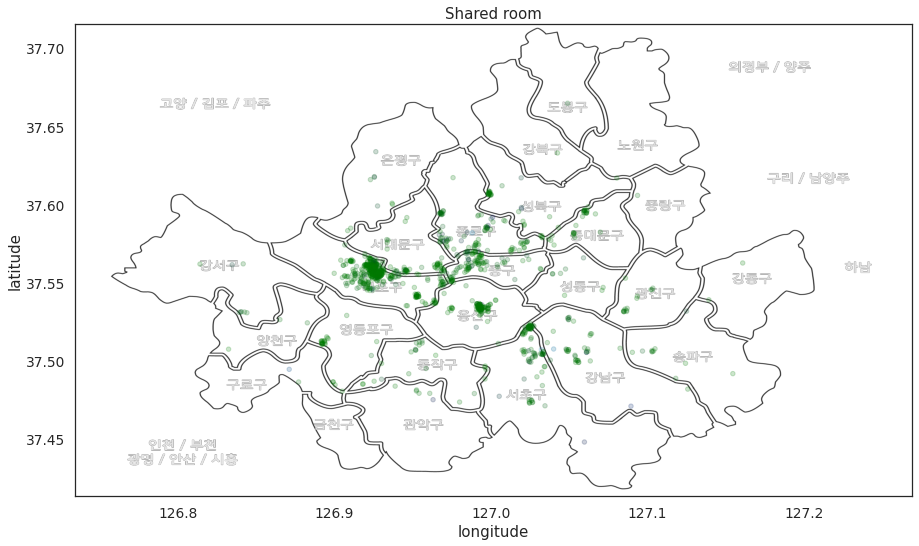

In [ ]:
#Check distribution of each room types in Seoul

import matplotlib.image as mpimg
seoul_img=mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Brain&ML final/Seoul map.png')

ax = sha_data.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,11),
                       c="price", cmap=plt.get_cmap(name = 'ocean'), 
                       colorbar=False, alpha=0.2, title = 'Shared room'
                      )

plt.imshow(seoul_img, extent=[126.734086, 127.269311, 37.413294, 37.715133], alpha=1)

plt.show()

Text(0.5, 1.0, 'Entire home/apt')

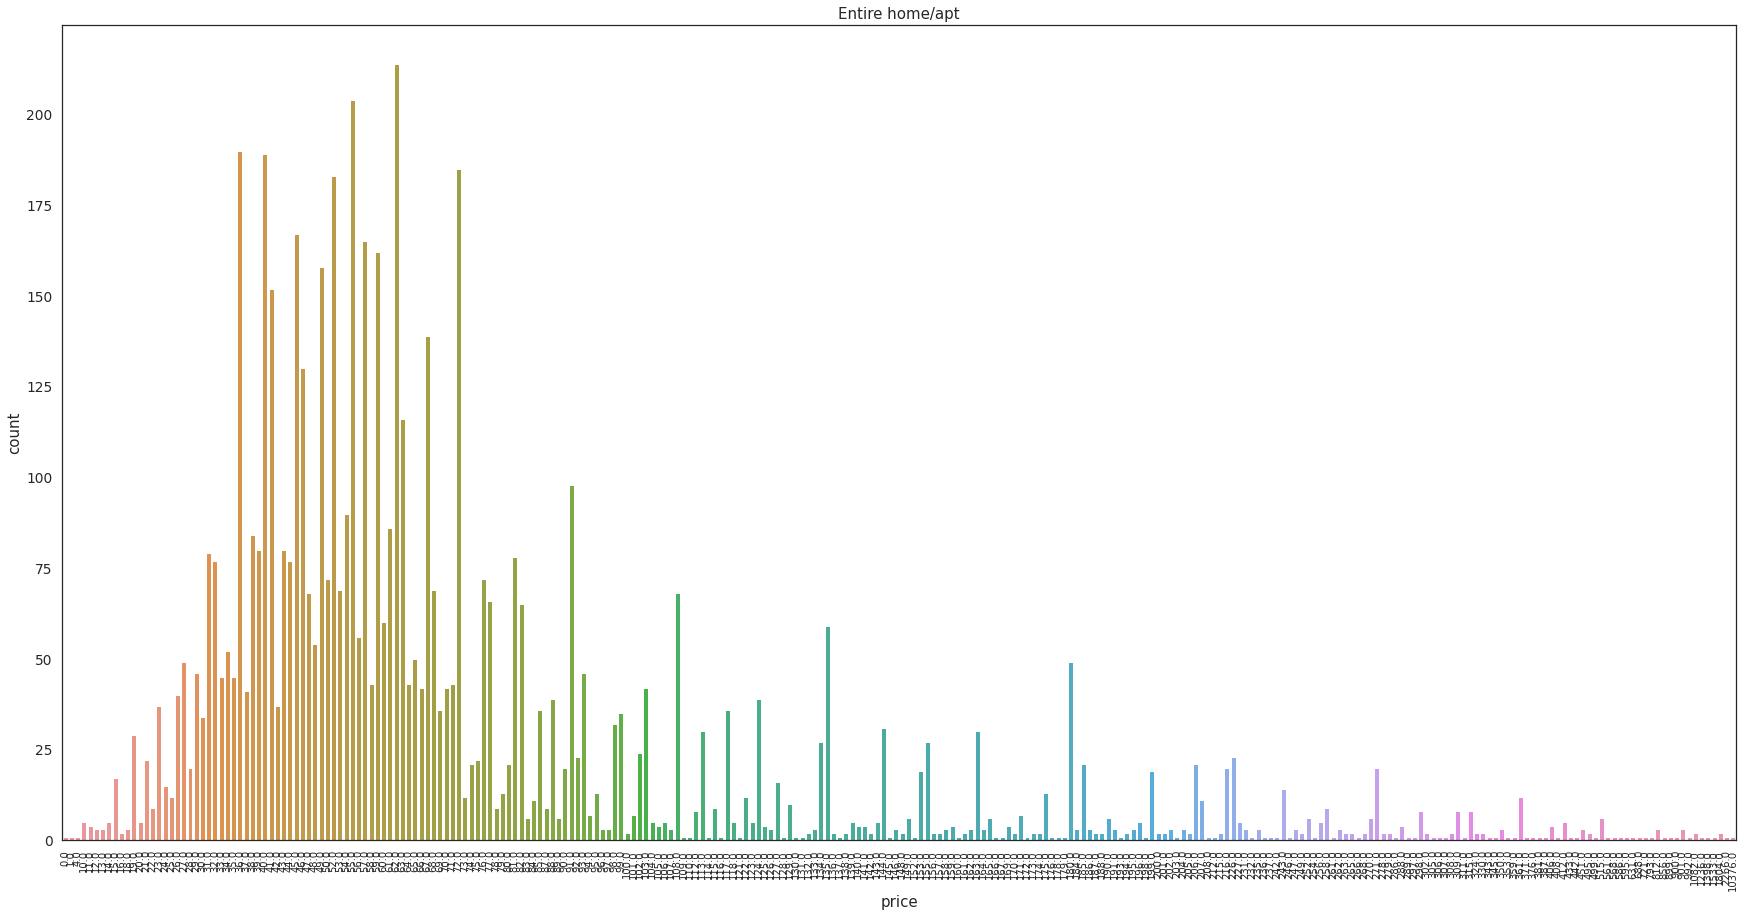

In [ ]:
plt.figure(figsize = (30,15))
sns.countplot(data = ent_data, x = 'price')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Entire home/apt')

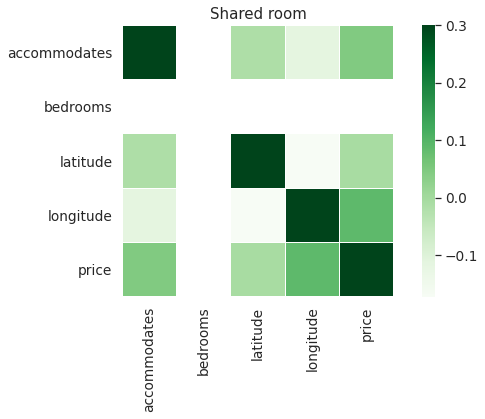

In [ ]:
import seaborn as sns

ent_corr = ent_data.corr()
pri_corr = pri_data.corr()
sha_corr = sha_data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio

with sns.axes_style("white"):
    sns.heatmap(sha_corr, vmax=.3, cmap='Greens', square=True, linewidths=.3)
    plt.title('Shared room')

In [ ]:
def plot_price(input):
    price_list = []
    for i in range(2,16):
        if i==2:
            index = i*10
            num = len(input.loc[input['price']<index,:])
            price_list.append(num)
        else:
            index = i*10
            num = len(input.loc[input['price']<index,:])
            num2 = len(input.loc[input['price']<index-10,:])
            pure_num = num-num2
            price_list.append(pure_num)
            
    over150 = len(input.loc[input['price']>150,:])
    price_list.append(over150)
    
    price_list = pd.DataFrame(price_list)
    
    price_index = pd.DataFrame(['<20','20~30','30~40','40~50','50~60','60~70','70~80','80~90',
                                '90~100','100~110','110~120','120~130','130~140','140~150','150<'])
    
    temp = pd.concat([price_index,price_list],axis=1)
    temp.columns = {'price':0,'number':0}
    
    return temp

In [ ]:
temp = plot_price(ent_data)

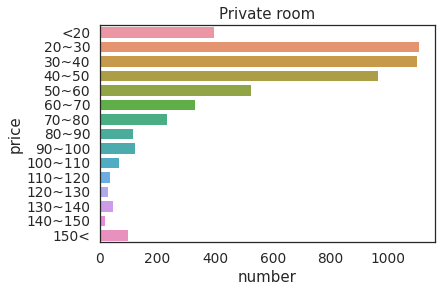

In [ ]:
sns.barplot(x = temp['number'],y=temp['price'],orient='h')
plt.title('Private room')
plt.show()

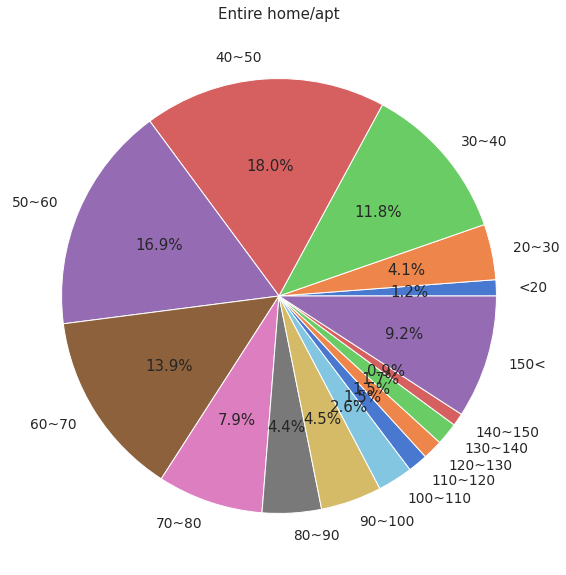

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(temp['number'], labels=temp['price'], autopct='%.1f%%')
plt.title('Entire home/apt')
plt.show()

처음에는 데이터의 상/하위 10%를 자르려고 했습니다만, 위의 데이터 분포를 보고 살펴보니 상위10%만 자르는게 조금더 데이터가 균일하게 분포되게 만들 수 있을 것 같았습니다.(도표 모음 참조)

실제로 위아래 10%자르는것보다 위에10%만 자르는게 살짝 점수가 더 높게 나왔습니다.

In [ ]:
#Dropout top 10%

def dropout(input):
  range = np.round(len(input)/10).astype(int)
  output = input.sort_values(by='price', ascending = True).iloc[:-range,:]
  return output

In [ ]:
ent_data = dropout(ent_data)
pri_data = dropout(pri_data)
sha_data = dropout(sha_data)

In [ ]:
ent_data.shape, pri_data.shape, sha_data.shape

((5555, 5), (4658, 5), (952, 5))

In [ ]:
ent_feature = ent_data.iloc[:,[0,1,2,3]]
ent_label = ent_data.iloc[:,4]
pri_feature = pri_data.iloc[:,[0,1,2,3]]
pri_label = pri_data.iloc[:,4]
sha_feature = sha_data.iloc[:,[0,2,3]]  #deleted bedroom features from shared_room types
sha_label = sha_data.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
features = ent_feature
label = ent_label
train_features, test_features, train_labels, test_labels = train_test_split(features,label,test_size=0.1,random_state=42)
train_features, valid_features, train_labels, valid_labels = train_test_split(train_features,train_labels, test_size=0.2, random_state=42)

#train 72%, validation 18%, test 10%

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
valid_features = scaler.transform(valid_features)

## XGB Regressor

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()
xgb.fit(train_features, train_labels, eval_set = [(valid_features, valid_labels)], early_stopping_rounds=2)

xgb_pred = xgb.predict(test_features)

[16:07:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21.0052
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:19.3004
[2]	validation_0-rmse:17.7397
[3]	validation_0-rmse:16.3936
[4]	validation_0-rmse:15.1848
[5]	validation_0-rmse:14.167
[6]	validation_0-rmse:13.2437
[7]	validation_0-rmse:12.477
[8]	validation_0-rmse:11.8145
[9]	validation_0-rmse:11.262
[10]	validation_0-rmse:10.7358
[11]	validation_0-rmse:10.341
[12]	validation_0-rmse:9.93866
[13]	validation_0-rmse:9.60352
[14]	validation_0-rmse:9.33553
[15]	validation_0-rmse:9.10974
[16]	validation_0-rmse:8.96161
[17]	validation_0-rmse:8.81963
[18]	validation_0-rmse:8.66725
[19]	validation_0-rmse:8.54846
[20]	validation_0-rmse:8.48603
[21]	validation_0-rmse:8.41692
[22]	validation_0-rmse:8.37383
[23]	validation_0-rmse:8.34533
[24]	validation_0-rmse:8.2635
[25]	validation_0-rmse:8.24069
[26]	validation_0-

R2 score

In [ ]:
xgb.score(train_features, train_labels)

0.36044862123445365

In [ ]:
xgb.score(valid_features, valid_labels)

0.14617847793095184

In [ ]:
xgb.score(test_features, test_labels)

0.2536634160293525

Plot prediction vs real price

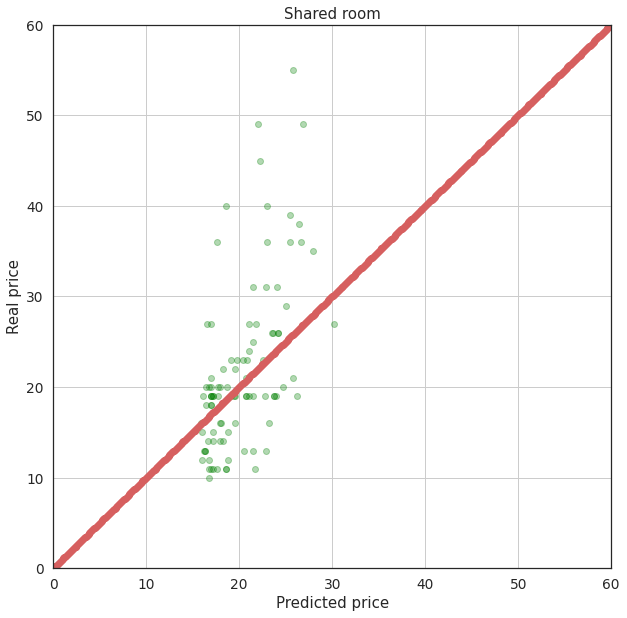

In [ ]:
exact = np.arange(0,300,0.1)
plt.figure(figsize=(10,10))
plt.scatter(xgb_pred,test_labels, c = 'green',alpha = 0.3)
plt.scatter(exact,exact, color = 'r')
plt.gca().set_xlim(0,60)
plt.gca().set_ylim(0,60)
plt.grid(True)
plt.ylabel('Real price')
plt.xlabel('Predicted price')
plt.title('Shared room')
plt.show()

## RandomForest Regressor

Best model

Entire home/apt : 'max_depth': 138, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80

Private room : 'max_depth': 57, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 126

Shared room : 'max_depth': 125, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 168

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
        'n_estimators': randint(low=1, high=200),
        'max_depth' : randint(low=1, high=200),
        'min_samples_leaf': randint(low=1, high=5),
        'min_samples_split': randint(low=1, high=5)
    }

RFreg = RandomForestRegressor(random_state=42, n_jobs=-1)
print("========== START RANDOM SEARCH with 5-Fold CV ===========")
rs = RandomizedSearchCV(RFreg, param_distributions=param_dist,
                                n_iter=10, cv=5, scoring='r2', random_state=4)
rs.fit(train_features, train_labels)
print("========== FINISH RANDOM SEARCH with 5-Fold CV ===========")

========== START RANDOM SEARCH with 5-Fold CV ===========


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

========== FINISH RANDOM SEARCH with 5-Fold CV ===========


In [ ]:
cvres = rs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.27663601704727575 {'max_depth': 123, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 198}
0.28612283225521457 {'max_depth': 130, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 51}
nan {'max_depth': 138, 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 104}
0.2792938839985052 {'max_depth': 110, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 184}
nan {'max_depth': 58, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 179}
0.27194619192987224 {'max_depth': 45, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 53}
0.26163377376210784 {'max_depth': 132, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 22}
0.2864475943948827 {'max_depth': 150, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 57}
0.26038393711596985 {'max_depth': 195, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 31}
0.28768518521451786 {'max_depth': 137, 'min_samples_leaf': 2, 'min_samples_spl

0.2989724330120252 {'max_depth': 125, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 168}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor(**{'max_depth': 57, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 126}).fit(train_features,train_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = RFreg.predict(valid_features)
rms = np.sqrt(mean_squared_error(valid_labels, y_pred))
print(rms)

13.06350884377295


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

multi_score = cross_val_score(RFreg,train_features,train_labels,cv=folds,scoring='r2')
np.mean(multi_score)

0.3402175281324283

In [ ]:
RFreg.score(valid_features,valid_labels)

0.1988378525738218

In [ ]:
RFreg.score(test_features,test_labels)

0.4980074206012131

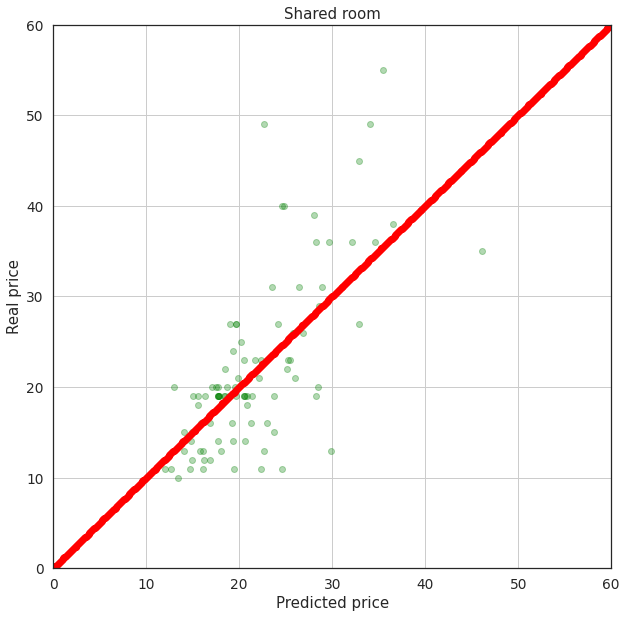

In [ ]:
RF_pred = RFreg.predict(test_features)

plt.figure(figsize=(10,10))
plt.scatter(RF_pred,test_labels, c='green', alpha=0.3)
plt.scatter(exact,exact, c='red')
plt.gca().set_xlim(0,60)
plt.gca().set_ylim(0,60)
plt.grid(True)
plt.ylabel('Real price')
plt.xlabel('Predicted price')
plt.title('Shared room')
plt.show()

## KNeighbor Regressor

Best model

Entire home/apt : 'n_neighbors': 37, 'p': 1, 'weights': 'distance'

Private room : 'n_neighbors': 37, 'p': 1, 'weights': 'distance'

Shared room : 'n_neighbors': 51, 'p': 1, 'weights': 'distance'

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range = np.arange(0, 100, 1)
param_grid = [{'n_neighbors': param_range,
               "p": [1, 2, 3]}]
KNR = KNeighborsRegressor(n_jobs=-1, weights = 'distance')
print("========== START GRID SEARCH with 10-Fold CV ===========")
gs = GridSearchCV(estimator=KNR, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
gs = gs.fit(train_features, train_labels)
print("========== FINISH GRID SEARCH with 10-Fold CV ==========")

========== START GRID SEARCH with 10-Fold CV ===========
========== FINISH GRID SEARCH with 10-Fold CV ==========


In [ ]:
print("{:.3f} {}".format(gs.best_score_, gs.best_params_))

0.310 {'n_neighbors': 51, 'p': 1}


In [ ]:
KNR = KNeighborsRegressor(**{'n_neighbors': 51, 'p': 1, 'weights': 'distance'}).fit(train_features,train_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = KNR.predict(valid_features)
rms = np.sqrt(mean_squared_error(valid_labels, y_pred))
print(rms)

7.374694254324017


R2 score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

multi_score = cross_val_score(KNR,train_features,train_labels,cv=folds,scoring='r2')
np.mean(multi_score)

0.31223852189965573

In [ ]:
KNR.score(valid_features, valid_labels)

0.30543032849394114

In [ ]:
KNR.score(test_features, test_labels)

0.38716521109896673

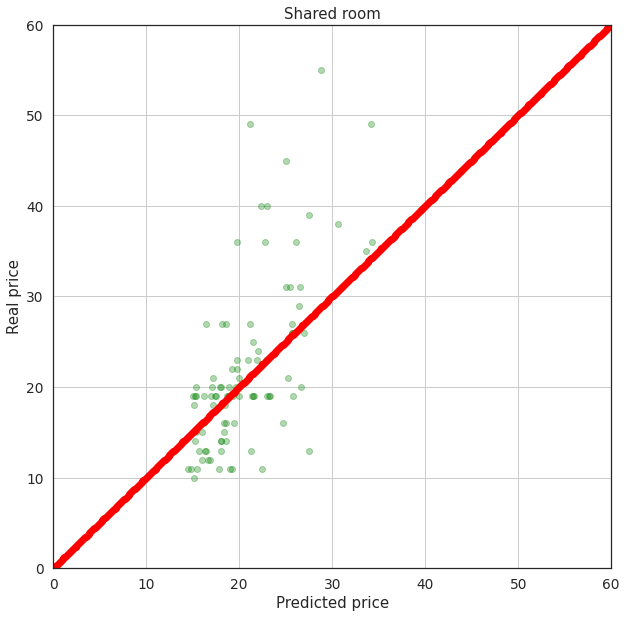

In [ ]:
KNR_pred = KNR.predict(test_features)

plt.figure(figsize=(10,10))
plt.scatter(KNR_pred,test_labels, c='green', alpha=0.3)
plt.scatter(exact,exact, c = 'red')
plt.gca().set_xlim(0,60)
plt.gca().set_ylim(0,60)
plt.grid(True)
plt.ylabel('Real price')
plt.xlabel('Predicted price')
plt.title('Shared room')
plt.show()

## Best regression model for each roomtypes

Entire home/apt : KNeighbor Regressor( n_neighbors = 37, p = 1, weights = 'distance')

Private room : KNeighbor Regressor( n_neighbors = 37, p = 1, weights = 'distance')

Shared room : KNeighbor Regressor( n_neighbors = 51, p = 1, weights = 'distance')